# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# question1

#1 make h ahistogram

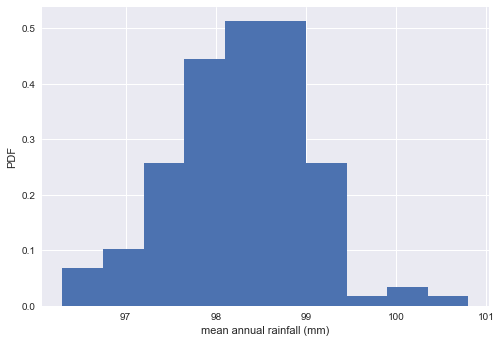

In [5]:
_ = plt.hist(df['temperature'], bins=10, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [6]:
import scipy
print(scipy.stats.normaltest(df['temperature']))

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


conclusion: based on this data distro mostly normal, H0 is that this distro is normal.
    we dont reject, we accept the null because the p-value is high (> 0.05) 
    null hypothesis trying to disprove. 

# question 2
Data set is large and the measurements are independent

# question 3
Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

0.0640566146952
The 95% confidence interval is  [ 98.143       98.37871154]
p-val = 0.0
0.0628792324319


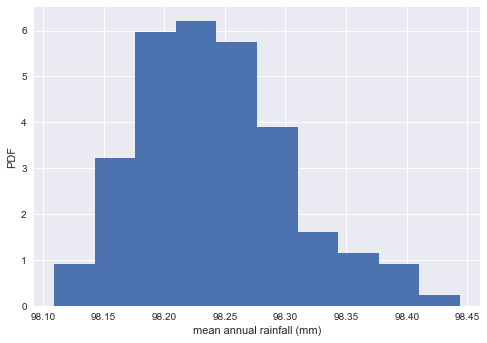

In [7]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#3 bootstrap to see real mean.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    #print(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
#when we fill bs replicates an array of means of the bootstrap samples
    return bs_replicates

temp = df['temperature']

bs_replicates = draw_bs_reps(temp, np.mean, len(temp))


# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print(sem)

#95% confidence interval
interval = np.percentile(bs_replicates, [2.5, 97.5])
print('The 95% confidence interval is ', interval)


### REALLY you do the bootstrap (with mean) and then take p value on that

#p value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-val =', p)

#we are rejecting null in favor of alternate, null is that mean is 98.6

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=10, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

plt.show()
#98.6 outside conf interval

### ANSWER: 

98.6 is outside the 95% cofidence interval it is definitley not the real mean

its one sample

would use t-test because we do not know the std deviation.

now do z test and t test on these things, p value is area in which the hull hypothesis can be rejected,
z is how far it is. z and t and f

In [8]:
#ANSWER:
#would do a one sample test, comparing one sample of data to a single number.
#would we do a z test or t test?
#one sample test and would do a t-test.
#temp_t = scipy.stats.zscore(temp)
#print(temp_z)
#using stats models test for mean based on normal distribution, one or two samples

t_test = (np.mean(temp) - 98.6)/(np.std(temp)/np.sqrt(len(temp)))
print(t_test)




-5.47592520208


In [9]:
from scipy import stats
n = len(temp)
pval = stats.t.sf(np.abs(t_test), n-1)*2
print(pval)

#small so reject null

2.18874646241e-07


# question 4
Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [10]:
#new small sample from large data set
new_sample = np.random.choice(temp, size=10)
print(new_sample)

#on this sample call same t-test, p value
#dont need bootstrap sample..

t_test_small = (np.mean(new_sample) - 98.6)/(np.std(new_sample)/np.sqrt(len(new_sample)))
print(t_test_small)

from scipy import stats
n = len(new_sample)
pval_small = stats.t.sf(np.abs(t_test_small), n-1)*2
print(pval_small)

#failed to reject null hypothesis because its greater
#in this case mean temp is around 98.6
#as sample becomes smaller its more difficult to make conculsions
#coincedence that we recovered litereature value

[ 97.8  98.2  98.2  98.6  98.7  99.2  98.4  98.   98.3  98.2]
-2.02547873417
0.0734690902686


We failed to reject null hypothesis because its greater
in this case mean temp is around 98.6
as sample becomes smaller its more difficult to make conculsions. coincedence that we recovered litereature value

# question 5
do percentile test, and whatever is above that/below

as you can see below 98.13 and above 98.39 would be considered abnormal

In [11]:

interval = np.percentile(bs_replicates, [2.5, 97.5])
print('The 95% confidence interval is ', interval)
 #above 98.39 would imply abnorbally high, and below 98.1 abnormally low

The 95% confidence interval is  [ 98.143       98.37871154]


# question 6
Is there a significant difference between males and females in normal temperature? What testing approach did you use and why? Write a story with your conclusion in the context of the original problem.

In [12]:
print(df.columns)

Index(['temperature', 'gender', 'heart_rate'], dtype='object')


In [13]:
#male_list = df['gender']
#list_males = [df['temperature'] for item in df['gender'] if item == 'M']

In [14]:
#female_list = df['gender']
#list_females = [df['temperature'] for item in df['gender'] if item == 'F']

In [15]:
#list_females = np.array(list_females)
#list_males = np.array(list_males)

In [16]:
df_male = df[df['gender'] == 'M']
male_temp = df_male['temperature']
male_temp = np.array(male_temp)

In [17]:
df_female = df[df['gender'] == 'F']
female_temp = df_female['temperature']
female_temp = np.array(female_temp)

In [18]:
import numpy as np
# Just do df[df['gender'] == 'M'] 

# Compute mean of all forces: mean_force

female_mean_temp = np.mean(female_temp)
male_mean_temp = np.mean(male_temp)

mean_temp = 98.6
# Generate shifted arrays

#use 2 sample from 2nd notebook

#THIS SAYS both means equal 98.6 !!!

female_shifted = female_temp - np.mean(female_temp) + 98.6
male_shifted = male_temp - np.mean(male_temp) + 98.6

# Compute 10,000 bootstrap replicates from shifted arrays

bs_replicates_a = draw_bs_reps(female_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(male_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates

bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p

empirical_mean_diff = female_mean_temp - male_mean_temp

p = (np.sum(bs_replicates >= empirical_mean_diff))/ len(bs_replicates)
print('p-value =', p)


p-value = 0.0111


The p value is less than 0.05 so we can reject the null hypothesis